In [10]:
# Importation des librairies et iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [11]:
# Chargement des données (Iris Dataset)
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])


In [12]:
# Préparation des données
X = data[['petal length (cm)', 'petal width (cm)']]
y = data['target']

In [13]:
print(X)

     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]


In [14]:
# Conversion des dataframes en tableau Numpy
X = data[['petal length (cm)', 'petal width (cm)']].to_numpy()
y = data['target'].to_numpy()

In [16]:
print(X)
type(X)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

numpy.ndarray

In [32]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


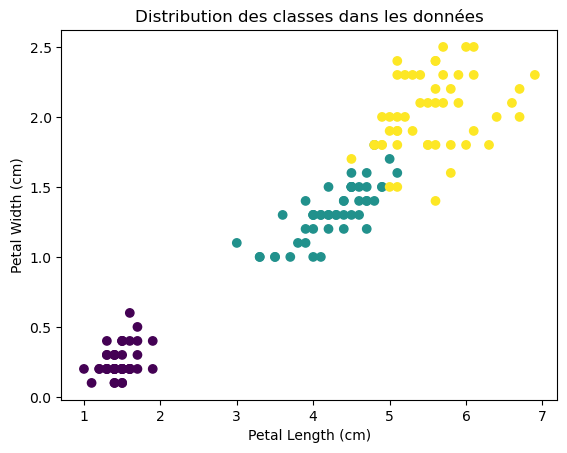

In [17]:
# Afficher les données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Distribution des classes dans les données')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

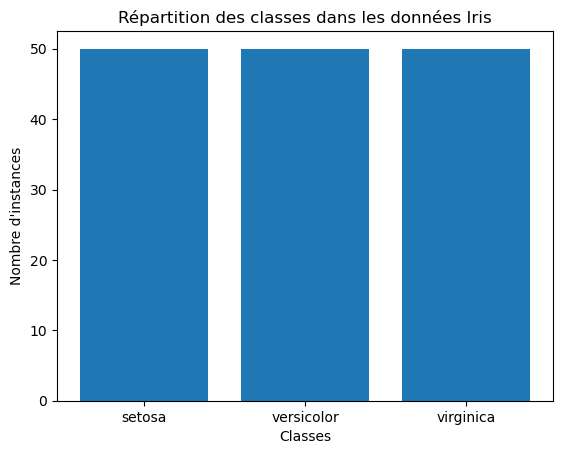

In [23]:
# Vérification graphique de la répartition des données
class_distribution = np.bincount(iris.target)
plt.bar(range(len(class_distribution)), class_distribution, tick_label=iris.target_names)
plt.title('Répartition des classes dans les données Iris')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'instances')
plt.show()

In [24]:
# Echantillonner les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Entrainer le modèle avec max_depth=3, puis max_depth=4 jusqu'à max_depth=10
depths = range(3, 11)

In [27]:
train_scores = []
test_scores = []
for depth in depths:
    # Création et entrainement du modèle
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Prédiction sur le jeu d'apprentissage
    y_train_pred = model.predict(X_train)
    
    # Prédiction sur le jeu de test
    y_test_pred = model.predict(X_test)
    
    # Evaluation des performances
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Stockage des résultats
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

In [28]:
print(y_train_pred)

[0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 2. 1. 1. 0. 0. 1. 2. 2. 1. 2. 1. 2. 1. 0.
 2. 1. 0. 0. 0. 1. 2. 0. 0. 0. 1. 0. 1. 2. 0. 1. 2. 0. 2. 2. 1. 1. 2. 1.
 0. 1. 2. 0. 0. 1. 1. 0. 2. 0. 0. 2. 1. 2. 1. 2. 2. 1. 0. 0. 2. 2. 0. 0.
 0. 1. 2. 0. 2. 2. 0. 1. 1. 2. 1. 2. 0. 2. 1. 2. 1. 1. 1. 0. 1. 1. 0. 1.
 2. 2. 0. 1. 2. 2. 0. 2. 0. 1. 2. 2. 1. 2. 1. 1. 2. 2. 0. 1. 2. 0. 1. 2.]


In [29]:
type(y_train_pred)

numpy.ndarray

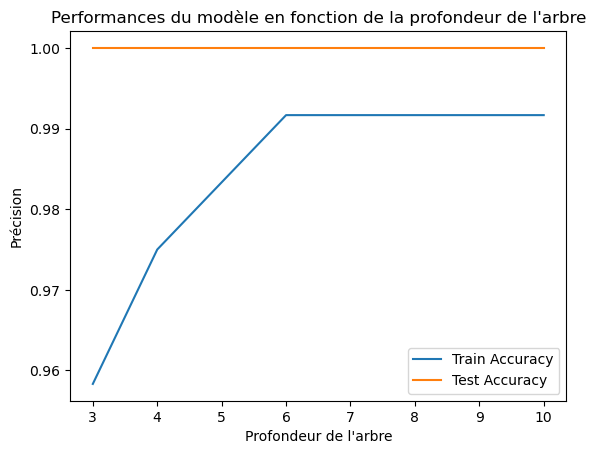

In [30]:
# Visualisation des performances en fonction de la profondeur de l'arbre
plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.title('Performances du modèle en fonction de la profondeur de l\'arbre')
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [31]:
# Synthèse et conclusion
best_depth = depths[np.argmax(test_scores)]
print(f"La meilleure profondeur de l'arbre est {best_depth} avec une précision de {max(test_scores):.2f} sur le jeu de test.")

La meilleure profondeur de l'arbre est 3 avec une précision de 1.00 sur le jeu de test.
